# 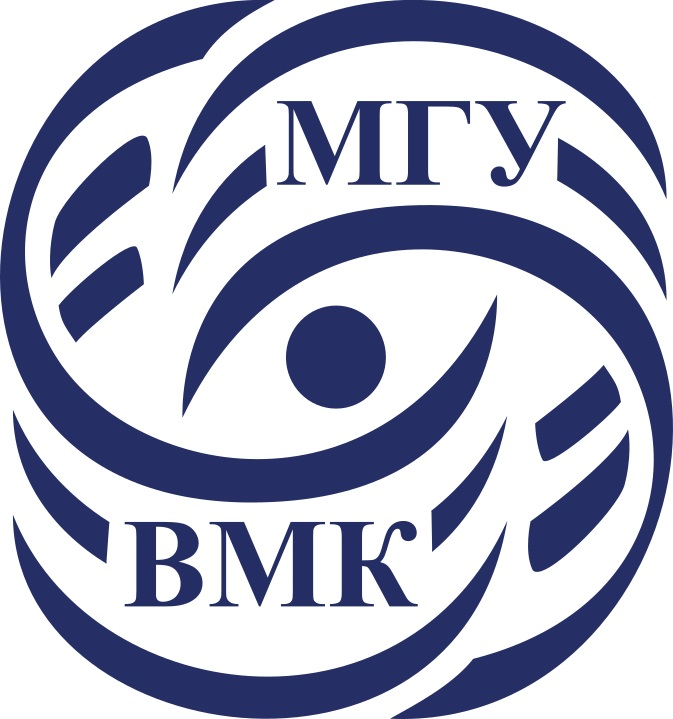

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 746kB/s]


Проверим версию библиотеки:

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части



<font color='MediumOrchid'>**Ваши выводы тут:**</font> При чрезмерном упрощении модели мы можем столкнуться с ситуацией, что все коэфициенты будут стремится к 0, поэтому некая независимость модели от параметра упрощения поможет избежать обнуления

-----
<font color="white" style="opacity:0.2023"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

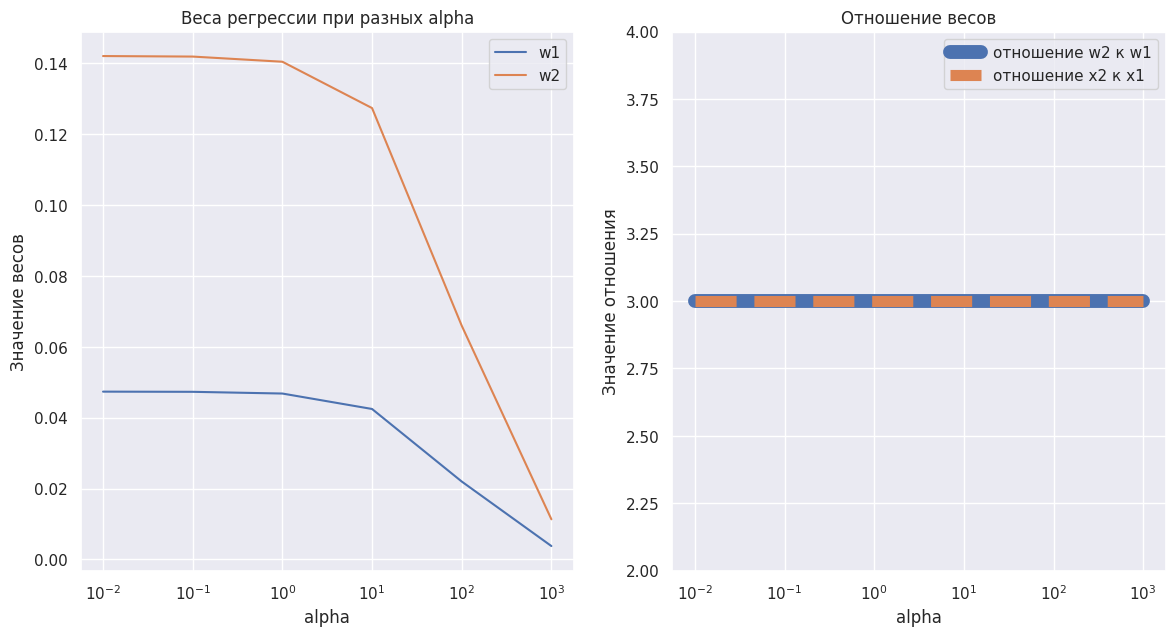

In [ ]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

<font color='MediumOrchid'>**Ваши выводы тут:**</font>
Рассмотрим задачу оптимизации функции потерь \( L(w) \), которая включает квадратичное отклонение модели от целевых значений и регуляризационный член:

$L(w) = (Xw - Y)^T(Xw - Y) + \alpha \cdot w^T w $

где:
- \( X \) — матрица признаков,
- \( w \) — вектор весов,
- \( Y \) — вектор целевых значений,
- \( a ) — коэффициент регуляризации.

Для минимизации \( L(w) \) вычисляем градиент по \( w \):

$ \frac{\partial L(w)}{\partial w} = 2X^T X w - 2X^T Y + 2\alpha w $


Уравниваем градиент к нулю:

$
2X^T X w - 2X^T Y + 2\alpha w = 0
$

После упрощения получаем систему линейных уравнений:

$
(X^T X + \alpha I) w = X^T Y$

Решение для вектора весов \( w \):

$
w = (X^T X + \alpha I)^{-1} X^T Y
$

Матрица признаков имеет следующую структуру:

$
X = \begin{bmatrix} x_1 & 3x_1 \\ x_2 & 3x_2 \\ \cdots & \cdots \end{bmatrix}
$

Тогда \( X^T X \) принимает вид:

$
X^T X = (x_1^2 + x_2^2 + \dots + x_n^2) \begin{bmatrix} 1 & 3 \\ 3 & 9 \end{bmatrix}
$

С учётом регуляризации, обратная матрица для $(X^T X + \alpha I) $ выглядит как:

$
(X^T X + \alpha I)^{-1} = \frac{1}{(x_1^2 + \dots + x_n^2)(\alpha - 10)} \begin{bmatrix} 9-\alpha & -3 \\ -3 & 1-\alpha \end{bmatrix}
$

Вектор \( X^T Y \) равен:
$
X^T Y = \begin{bmatrix} \sum_{i=1}^n x_i y_i \\ 3 \sum_{i=1}^n x_i y_i \end{bmatrix}
$

Подставляя в формулу для \( w \), получаем:

$
w = -\alpha \frac{\sum_{i=1}^n x_i y_i}{(x_1^2 + \dots + x_n^2)(\alpha - 10)} \begin{bmatrix} 1 \\ 3 \end{bmatrix}
$

Аналитическое решение показывает, что:
1. Веса $ w_1 $ и $ w_2 $ всегда пропорциональны: $ w_2 = 3w_1 $.
2. С изменением коэффициента регуляризации $ \alpha $ отношение $\frac{w_2}{w_1} = 3 $ остаётся неизменным. Это связано со структурой матрицы \( X \), где второй столбец равен $ 3 $-кратному первому столбцу.

Таким образом, изменение $ \alpha $ влияет на масштаб весов, но не на их относительное соотношение.

-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>
$L(w) = \sum\limits_{i=1}^n(x_iw_i - y_i)^2 + \alpha\sum\limits_{i=1}^n|w_i|$, $\alpha \ge 0$

$\frac{\partial L(w)}{\partial w_i} = 2(x_iw_i - y_i)x_i + \alpha \>sgn(w_i) = 0$

При достаточно большом $\alpha$ происходит зануление весов

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1565993237388008

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1577530951954324

Веса, при alpha = 0.00001
w1: 0.3966873199145481 	w2: 0.025639365702912847



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>
Значение α пропорционально количеству ненулевых признаков, поэтому
 при α=0.00001 веса не равны нулю, так как в этом случае регуляризация минимальна, и модель лучше подстраивается под данные, что приводит к ненулевым коэффициентам (модель поведения можно увидеть на графике ниже)

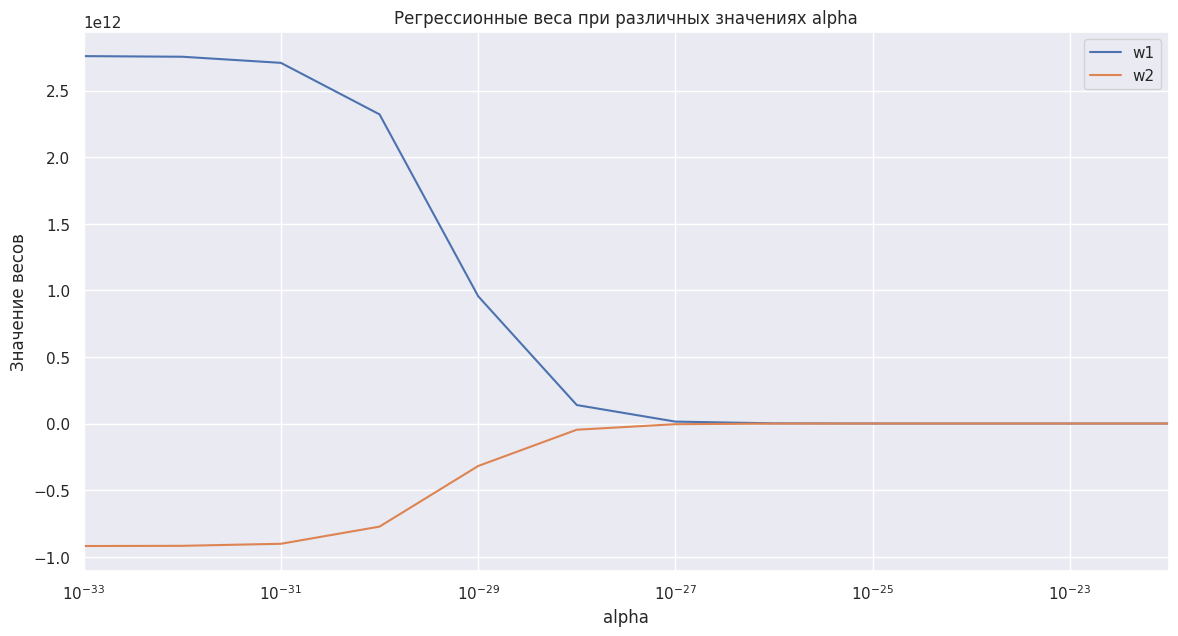

In [ ]:
w1_vals = []
w2_vals = []

alpha_values = []
alpha_step = 1
while alpha_step > 1e-35:
    alpha_values.append(alpha_step)
    alpha_step /= 10

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X3, Y3)
    w1_vals.append(model.coef_[0])
    w2_vals.append(model.coef_[1])

w1_vals = np.array(w1_vals)
w2_vals = np.array(w2_vals)

plt.figure(figsize=(14, 7))
plt.plot(alpha_values, w1_vals, label="w1")
plt.plot(alpha_values, w2_vals, label="w2")
plt.xscale("log")
plt.title("Регрессионные веса при различных значениях alpha")
plt.xlabel("alpha")
plt.ylabel("Значение весов")
plt.xlim([1e-33, 1e-22])
plt.legend()
plt.show()


-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

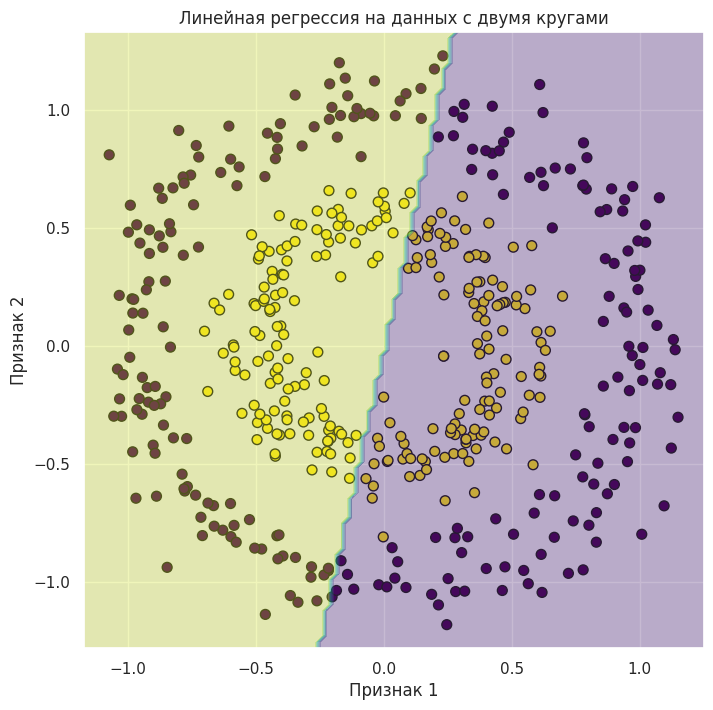

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5)

log_reg = LogisticRegression()
log_reg.fit(X, y)

plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('Линейная регрессия на данных с двумя кругами')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=100.0)
lasso_reg.fit(X_full, y)
print("Коэффициенты с Lasso:", lasso_reg.coef_)


Коэффициенты с Lasso: [0. 0.]


<font color='MediumOrchid'>**Ваши выводы тут:**</font>
С Lasso и высоким значением регуляризации (например,
α=100) модель, скорее всего, занулит коэффициент для x2
 , так как x2
  является линейной зависимостью от
𝑥1​
 , и добавление
𝑥2
  в модель не добавляет полезной информации.

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
